In [1]:
import pandas as pd
df = pd.read_csv('googleplaystore.csv')
df_reviews = pd.read_csv('googleplaystore.csv')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=df[df['Rating'] <=5]

df.drop_duplicates(subset='App', inplace=True)
print('Number of apps after removing duplicates:', len(df))

Number of apps after removing duplicates: 8196


In [4]:
df.drop(labels = ['Current Ver','Android Ver','Last Updated'], axis = 1, inplace = True)

### some cleaning stuff ahead

In [5]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'nan') if 'Varies with device' in str(x) else x)
#Scaling all the values to Millions format (means that 19.0 => 19x10^6 => 19M)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x : float(x))
df = df[pd.notnull(df['Size'])]

In [6]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x : float(x))

In [7]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [8]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x : float(x))

In [9]:
df['Reviews'] = df['Reviews'].apply(lambda a: float(a))
df['Rating'] = df['Rating'].apply(lambda x: float(x))

In [10]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

In [11]:
from sklearn import preprocessing

df['Type'] = pd.get_dummies(df['Type'])
enc = preprocessing.LabelEncoder()
df['Genres'] = enc.fit_transform(df['Genres'])
df['Content Rating'] = enc.fit_transform(df['Content Rating'])

In [12]:
df['Category'] = pd.get_dummies(df['Category'])

- Total number of ratings: 7027
- Mean of distribution of rating : 4.160623310089655
- Standard deviation: 0.5591057007040927


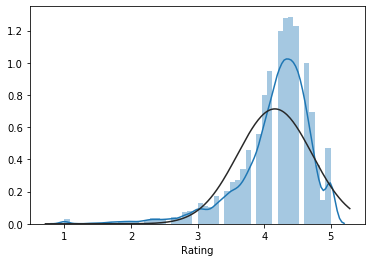

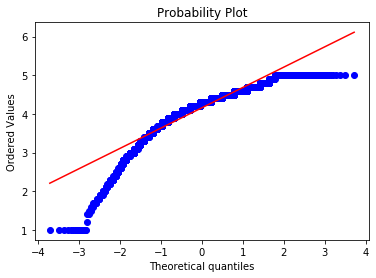

In [16]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm
sns.distplot(df['Rating'],fit=norm)
print('- Total number of ratings:', len(df['Rating']))
print('- Mean of distribution of rating :', np.mean(df['Rating']))
print('- Standard deviation:', np.std(df['Rating']))

fig = plt.figure()
prob = stats.probplot(df['Rating'], plot=plt)

In [ ]:
from scipy.stats import boxcox
bcx_target, lam =boxcox(df['Rating'])
sns.distplot(bcx_target,fit=norm);
fig = plt.figure()
prob = stats.probplot(bcx_target, plot=plt)

- Total number of ratings: 7027
- Mean distribution: 21.754427280489537
- Standard deviation: 22.724885983849997


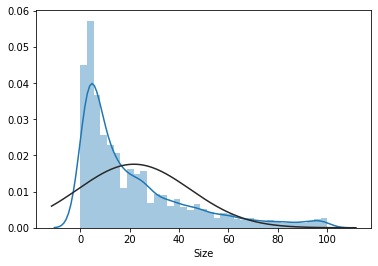

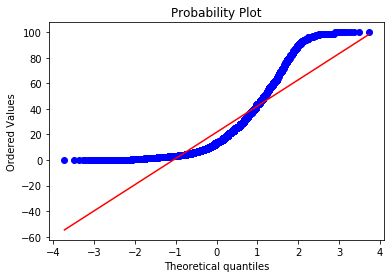

In [14]:
sns.distplot(df['Size'],fit=norm)
print('- Total number of ratings:', len(df['Size']))
print('- Mean distribution:', np.mean(df['Size']))
print('- Standard deviation:', np.std(df['Size']))
fig = plt.figure()
prob = stats.probplot(df['Size'], plot=plt)

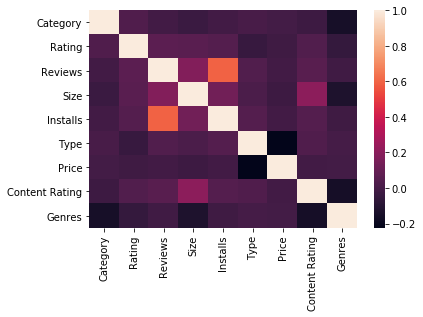

In [16]:
sns.heatmap(df.corr())

In [17]:
from sklearn.model_selection import train_test_split
chosen_features = ['Reviews', 'Size', 'Installs', 'Type','Category', 'Price', 'Content Rating', 'Genres']
X = df[chosen_features]
y= bcx_target #transformed rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import auc, accuracy_score, mean_absolute_error, mean_squared_error
from scipy.special import boxcox, inv_boxcox

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
y_rfpred = rf_reg.predict(X_test)

In [19]:
mse=mean_squared_error(inv_boxcox(y_test,lam), inv_boxcox(y_rfpred,lam))
mae=mean_absolute_error(inv_boxcox(y_test,lam), inv_boxcox(y_rfpred,lam))
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)

Mean Squared Error: 0.2686623473123064
Mean Absolute Error: 0.3522890835972686


Text(0, 0.5, 'Predicted Ratings')

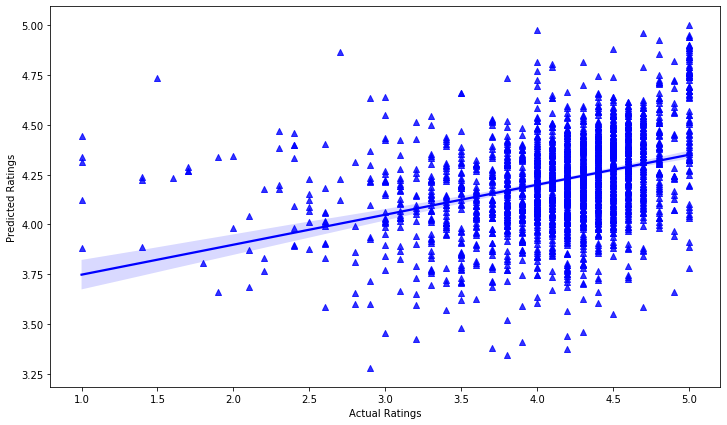

In [20]:
plt.figure(figsize=(12,7))
sns.regplot(inv_boxcox(y_test,lam),inv_boxcox(y_rfpred,lam), marker = '^',color="b")
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')

In [21]:
## what i am trying to say is off 

x= inv_boxcox(y_test,lam)

In [22]:
print(x)

[4.7 4.3 4.  ... 4.3 4.  4.2]


In [23]:
y=inv_boxcox(y_rfpred,lam)

In [24]:
print(y)

[4.41836882 4.23889685 4.23232413 ... 4.24836694 4.0721098  4.11989353]


In [25]:
print(x[1])

4.3


In [26]:
print(y[1])

4.238896854861138


### Thank you